In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# Load diamonds dataset
df = pd.read_csv('diamonds.csv')

# Display first few rows
print(df.head())

   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75  


EDA (EXPLORATORY DATA ANALYSIS)

In [2]:
df.info(

)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53939 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53939 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [3]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53939.000000,53940.000000,53940.000000
mean,26969.500000,0.797940,61.749405,57.457184,3932.799722,5.731153,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121771,1.142135,0.705699
min,0.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13484.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26969.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40454.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53939.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


extra column not useful

In [4]:
df = df.drop(columns=["Unnamed: 0"])
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
# Check how many duplicate rows exist
print(df.duplicated().sum())


146


In [6]:
# print(df[df.duplicated()])
df = df.drop_duplicates()
print(df.duplicated().sum())

0


In [7]:
# df.size
df.isnull().sum()

carat      0
cut        0
color      0
clarity    1
depth      0
table      0
price      0
x          1
y          0
z          0
dtype: int64

In [8]:
print(df[df.isnull().any(axis=1)])  # Show rows with any nulls

     carat        cut color clarity  depth  table  price     x     y     z
113   0.74  Very Good     G     NaN   62.2   59.0   2762  5.73  5.82  3.59
286   0.81  Very Good     H     SI2   61.3   59.0   2797   NaN  6.01  3.66


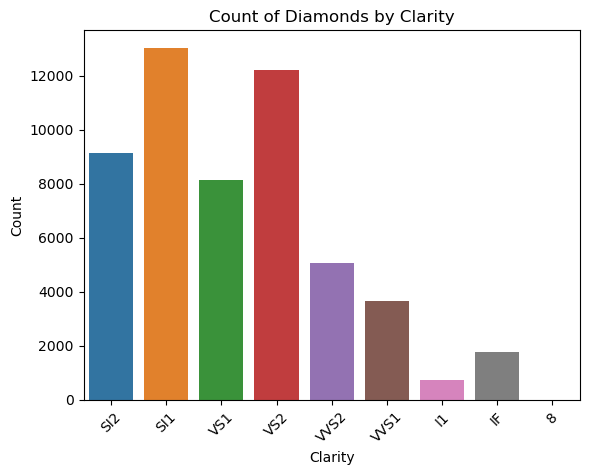

In [9]:


sns.countplot(data=df, x='clarity')

plt.title('Count of Diamonds by Clarity')
plt.xlabel('Clarity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



In [10]:
most_common = df['clarity'].mode()[0]
df['clarity'] = df['clarity'].fillna(most_common)

In [11]:
print(df['clarity'].isnull().sum())


0


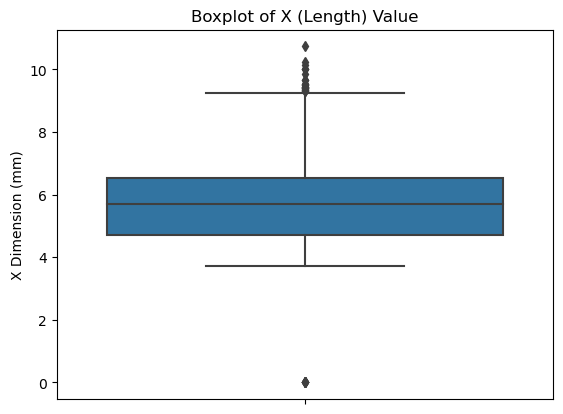

In [12]:
sns.boxplot(data=df, y='x')

plt.title('Boxplot of X (Length) Value')
plt.ylabel('X Dimension (mm)')
plt.show()

In [13]:
median_x = df['x'].median()
df['x'] = df['x'].fillna(median_x) 


In [14]:

print(df["x"].isnull().sum())

0


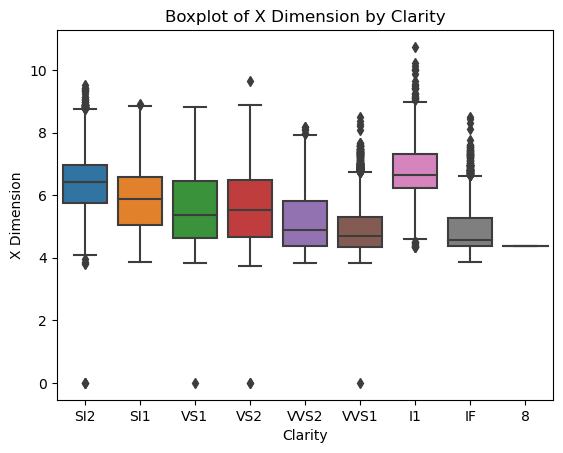

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot of x by clarity
sns.boxplot(data=df, x='clarity', y='x')

plt.title('Boxplot of X Dimension by Clarity')
plt.xlabel('Clarity')
plt.ylabel('X Dimension')
plt.show()

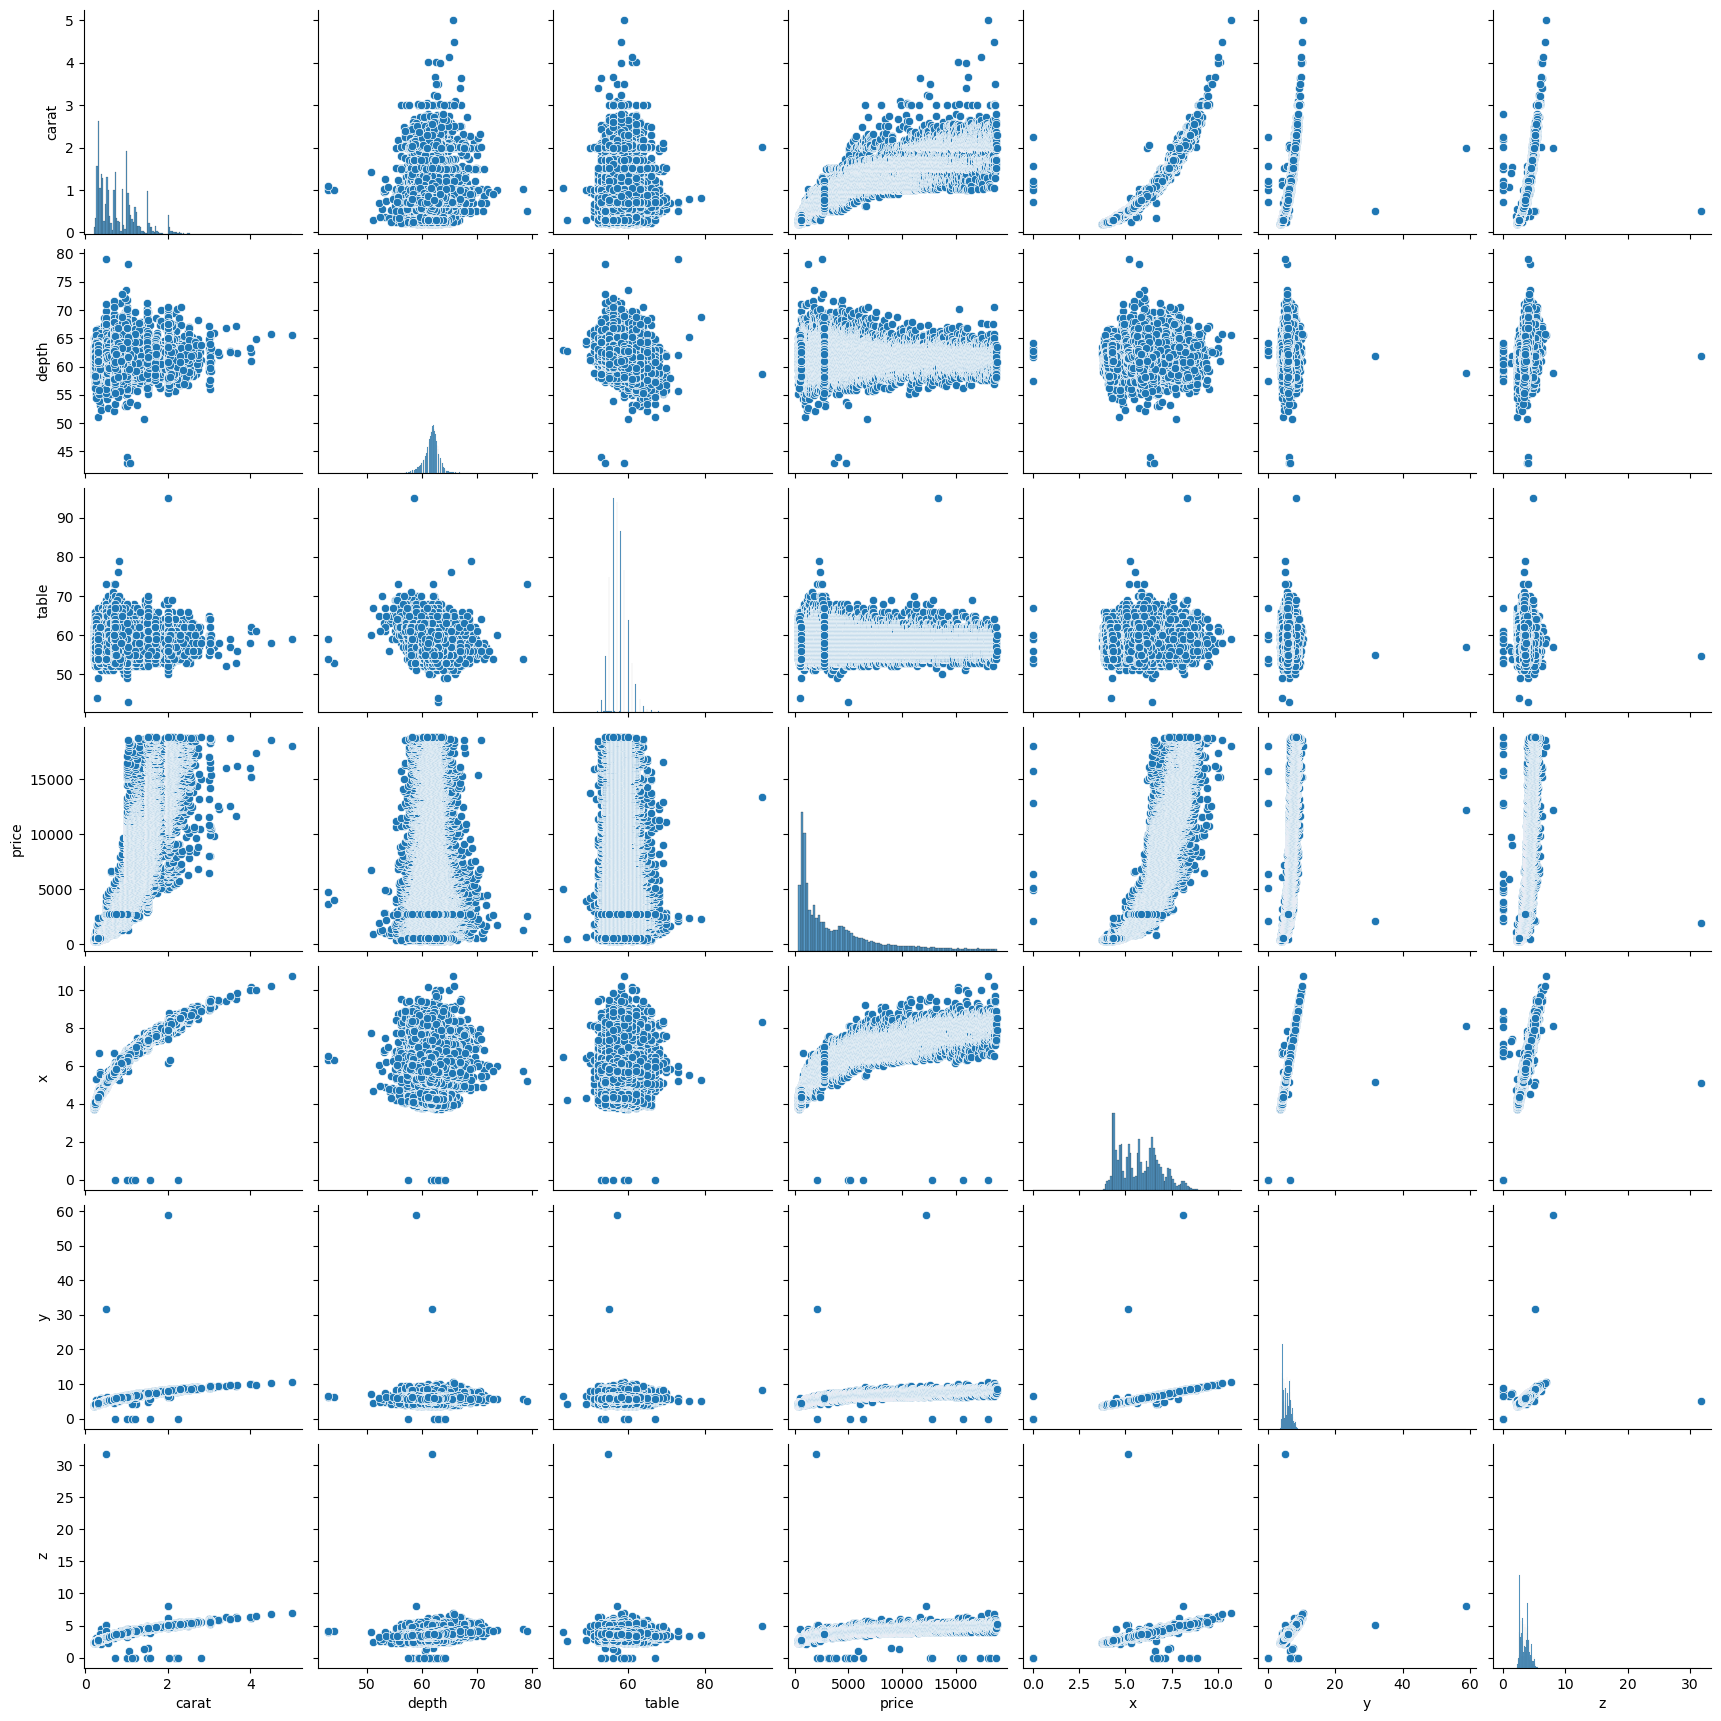

In [16]:
sns.pairplot(data=df)

there's strong correlation between x vs price

x vs carat

there're outliers in the x , y ,z 

depth and table are low impact feature 

encoding categorical data

In [17]:
clarity_order = {
    'I1': 0,
    'SI2': 1,
    'SI1': 2,
    'VS2': 3,
    'VS1': 4,
    'VVS2': 5,
    'VVS1': 6,
    'IF': 7
}

df['clarity_encoded'] = df['clarity'].map(clarity_order)


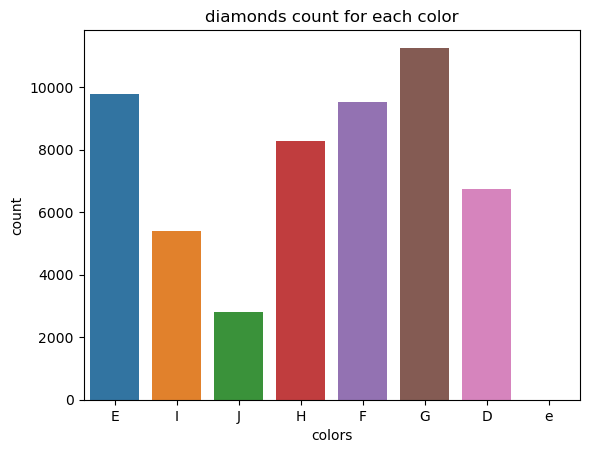

In [18]:
sns.countplot(data=df, x="color")
plt.title("diamonds count for each color")
plt.ylabel("count")
plt.xlabel("colors")

plt.show()


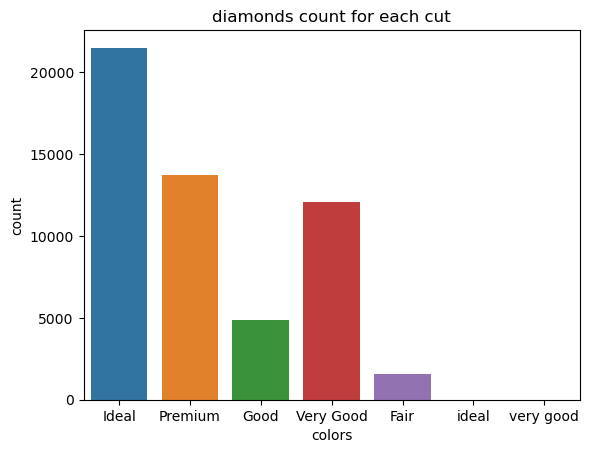

In [19]:
sns.countplot(data=df, x="cut")
plt.title("diamonds count for each cut")
plt.ylabel("count")
plt.xlabel("colors")

plt.show()


inconsistent text formatting, which results in extra dummy columns
so i have to overcame this problem

In [20]:
df['cut'] = df['cut'].str.title()
df['color'] = df['color'].str.upper()

using hot-enncoding for nominal data like color and cut

In [21]:
df_encoded = pd.get_dummies(df, columns=['color', 'cut'], drop_first=True)

In [22]:
print(df_encoded.columns)

Index(['carat', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z',
       'clarity_encoded', 'color_E', 'color_F', 'color_G', 'color_H',
       'color_I', 'color_J', 'cut_Good', 'cut_Ideal', 'cut_Premium',
       'cut_Very Good'],
      dtype='object')


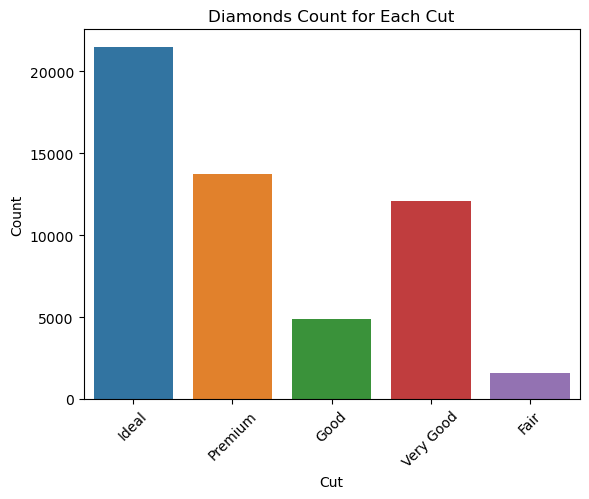

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='cut')
plt.title('Diamonds Count for Each Cut')
plt.xlabel('Cut')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'check before scaling')

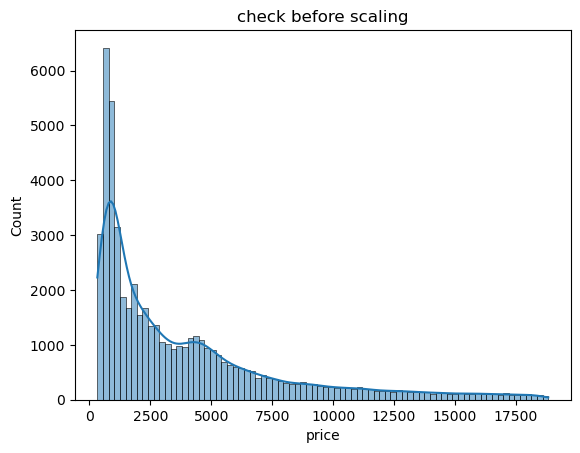

In [24]:
import seaborn as sns
sns.histplot(df['price'], kde=True)
plt.title('check before scaling')

it's skewed to the right , so best scaling option is log transformation 
we scale the numeric data because many ml algo are senstive to the scale of input features

In [25]:
import numpy as np
df["price_log"]=np.log(df["price"])

Text(0.5, 1.0, 'after scaling')

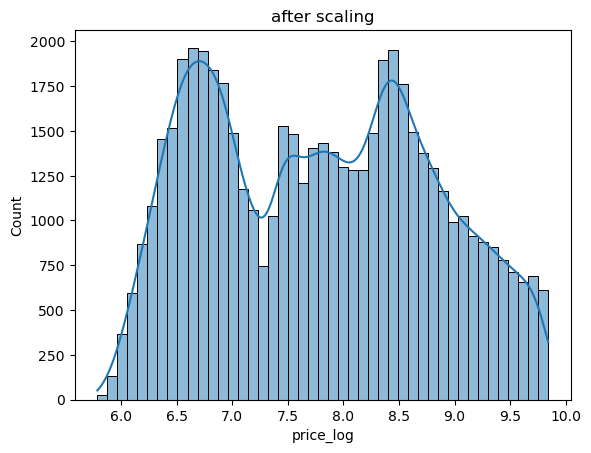

In [26]:
sns.histplot(df['price_log'],kde=True)
plt.title("after scaling")

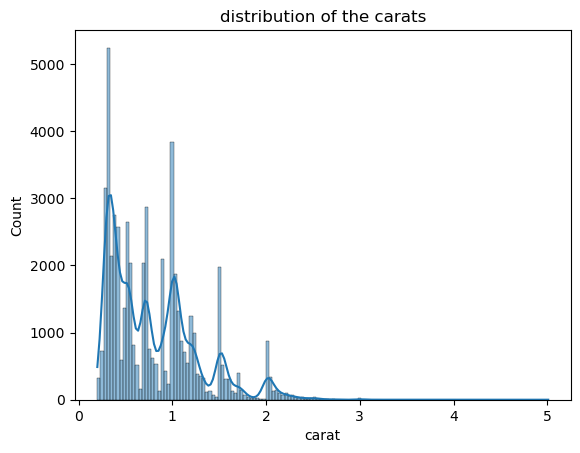

In [27]:
sns.histplot(df['carat'],kde=True)
plt.title('distribution of the carats')
plt.show()

carats is skewed the right so,it needs log transformation aswell,

Most diamonds are between 0.2 and 1.5 carats,

There are visible peaks at specific carat values (common market sizes)

In [28]:
df["carat_log"]=np.log1p(df['carat'])    #this to include the zero

Text(0.5, 1.0, 'after scaling the carats by log-transformation')

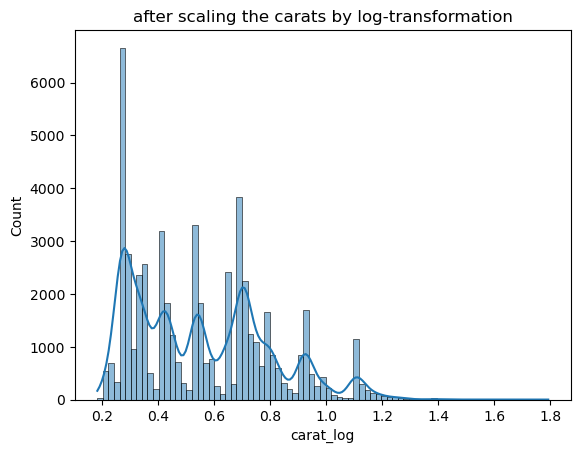

In [29]:
sns.histplot(df['carat_log'], kde=True)
plt.title('after scaling the carats by log-transformation')

 i want to group the dimensions of the diamond in one column before scaling

In [31]:
df['volume'] = df['x'] * df['y'] * df['z']
#This gives the approximate volume of the diamond in cubic mm

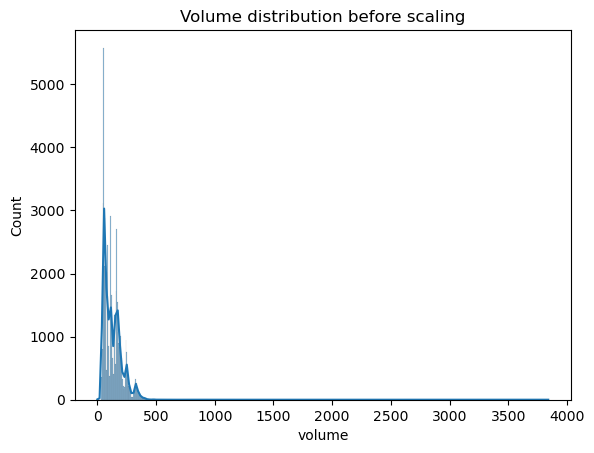

In [32]:
sns.histplot(df['volume'], kde=True)
plt.title("Volume distribution before scaling")
plt.show()

obviously, right skewed

In [34]:
df['volume_log']=np.log1p(df['volume'])

Text(0.5, 1.0, 'show volume of diamonds with number after  scaling')

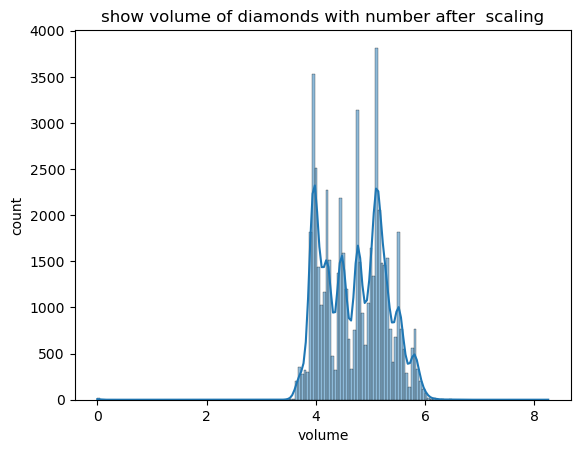

In [37]:
sns.histplot(df['volume_log'],kde=True)
plt.xlabel('volume')
plt.ylabel('count')
plt.title("show volume of diamonds with number after  scaling")

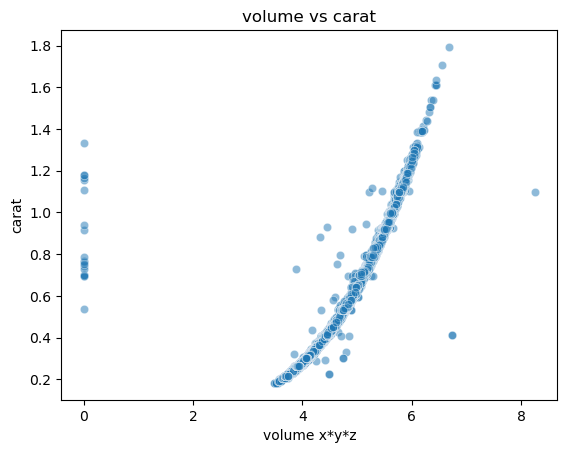

In [44]:
sns.scatterplot(data=df, x="volume_log", y="carat_log" , alpha=0.5)
plt.title('volume vs carat')
plt.xlabel('volume x*y*z')
plt.ylabel('carat')
plt.show()

strong corelation between volume and carat as since volume of diamond increase the carat increase

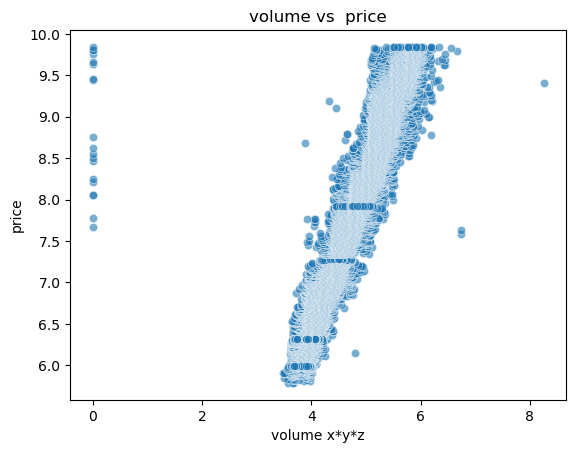

In [46]:
sns.scatterplot(data=df, x="volume_log", y="price_log" , alpha=0.6)
plt.title('volume vs  price')
plt.xlabel('volume x*y*z')
plt.ylabel('price')
plt.show()

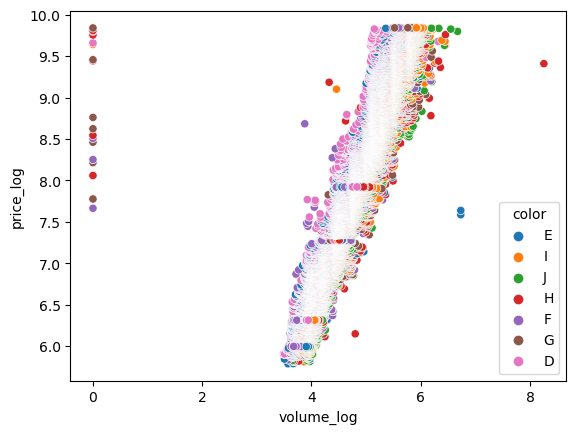

In [51]:
sns.scatterplot(data=df, x='volume_log', y='price_log', hue='color')
plt.xlabel=('volume_log')
plt.ylabel=('price_log')